In [18]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

def execute_circuit_sv(quantum_circuit):
    """
    Ejecuta un circuito cuántico en el simulador de estado vectorial, obtiene los resultados,
    dibuja el circuito y genera la visualización de la esfera Q.

    Args:
        quantum_circuit (QuantumCircuit): El circuito cuántico a ejecutar.

    Returns:
        tuple: Una tupla que contiene:
            - statevector_results (list): El estado vectorial resultante tras la ejecución.
            - circuit_diagram (str): Representación textual del diagrama del circuito.
            - q_sphere (matplotlib.figure.Figure): Figura de la esfera Q generada a partir del estado vectorial.
    """
    # Obtener el simulador de estado vectorial
    statevector_simulator = Aer.get_backend('statevector_simulator')
    
    # Ejecutar el circuito en el simulador
    job = statevector_simulator.run(quantum_circuit)
    result = job.result()
    
    # Obtener el estado vectorial
    statevector_results = result.get_statevector()
    
    # Dibujar el circuito
    circuit_diagram = quantum_circuit.draw(output='mpl')
    
    # Dibujar la esfera Q
    q_sphere = plot_state_qsphere(statevector_results)
    
    # Retornar los resultados
    return statevector_results, circuit_diagram, q_sphere


## Aplicando la puerta NOT (X) de Pauli

La puerta **X** también se llama puerta NOT debido al efecto similar que tiene sobre los estados base, comparable a su contraparte clásica. Una diferencia notable es que la puerta X mueve el vector de estado de un estado base a otro, como se ilustra en la tabla correspondiente. Visualizar esta operación puede realizarse a través del resultado en la esfera de Bloch como una rotación del vector desde el estado inicial $ |0\rangle $.

Debido a su representación esférica, estas operaciones se describen como rotaciones alrededor de algún eje. En este caso, la puerta X realiza una rotación de $ \pi $ (180°) alrededor del eje $ x $, y se representa mediante el operador de la puerta **X** de Pauli como:

$$
X = \sigma_1 =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

La siguiente tabla de verdad ilustra que esta operación rota la entrada alrededor del eje $ x $ por $ \pi $ (180°). Por lo tanto, si la entrada es $ |0\rangle $, la salida es $ |1\rangle $, y viceversa:

<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|0⟩</td>
    <td>|1⟩</td>
  </tr>
  <tr>
    <td>|1⟩</td>
    <td>|0⟩</td>
  </tr>
</table>



Ahora vamos a crear un circuito siguiendo los siguientes pasos:

1. Primero, añade una puerta X al circuito y ejecútalo utilizando nuestra función auxiliar para realizar las tareas principales por nosotros.


In [19]:
# Compuerta X
# Crea un circuito de 1 qubit 

qc = QuantumCircuit(1)

# Agrega una compuerta X
qc.x(0)

#ejecuta el circuito y captura los resultados
result, img, qshere = execute_circuit_sv(qc)

2. Vamos a examinar el vector de estado ejecutando la siguiente celda. Esto debería darme el estado del qubit

In [20]:
result

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


3. Ahora, vamos a dibujar el circuito para la compuerta $X$, ejecutando la siguinete celda

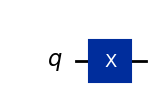

In [21]:
img

4. Ahora vamos a observar la representación de la qSphere ejecutando la siguiente celda 

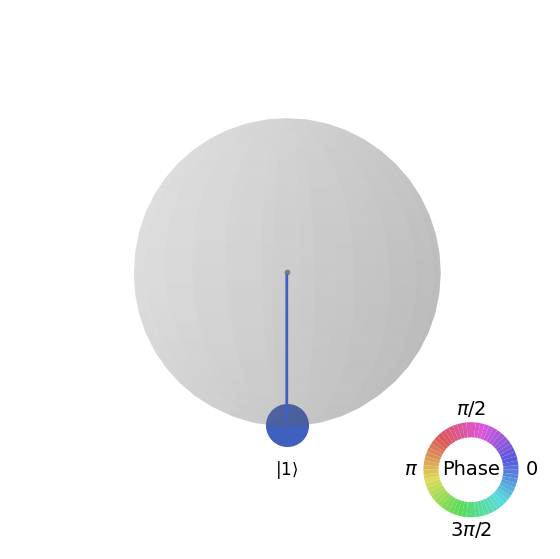

In [22]:
qshere

Como hemos visto, la puerta X sirve como un buen ejemplo de que las puertas cuánticas también pueden usarse para realizar las mismas operaciones que las puertas clásicas. Otra cosa que notarás del resultado de la esfera de Qiskit es la rueda de colores que representa la fase del vector de estado, que en este caso es roja para indicar que está en fase $(0^\circ)$


## Trabajando con la puerta Y de Pauli

La puerta **Y** es una rotación alrededor del eje $ y $ por $ \pi $ (180°), representada de la siguiente manera:

$$
Y = \sigma_2 =
\begin{pmatrix}
0 & i \\
-i & 0
\end{pmatrix}
$$

La siguiente tabla de verdad ilustra que la operación rota la entrada alrededor del eje $ y $ por $ \pi $ (180°). Por lo tanto, si la entrada es $ |0\rangle $, la salida es $ i|1\rangle $ y viceversa:

<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|0⟩</td>
    <td>i|1⟩</td>
  </tr>
  <tr>
    <td>|1⟩</td>
    <td>-i|0⟩</td>
  </tr>
</table>

1. Primero vamos a añadir una compuerta $Y$ y vamos a ejecutar empleando nuestra función auxiliar que nos proporciona el circuito cuántico y la reprrsentación visual. 

In [23]:
qc = QuantumCircuit(1)

qc.y(0)

result, img, qshere = execute_circuit_sv(qc)

2. vamos a examinar nuestro vector de estado

In [24]:
result

Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


3. Vamos a graficar el circuito

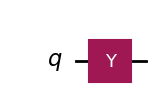

In [25]:
img

4. Vamos a observar la representación en la qSphere 

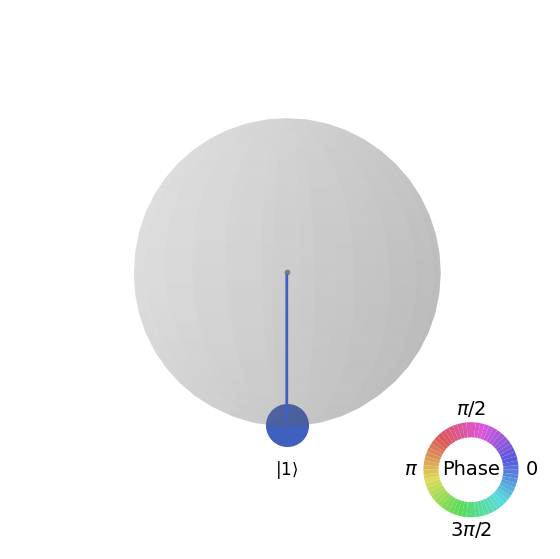

In [26]:
qshere

La compuerta $Y$ como pueden notar se comporta en forma similar a la compuerta $X$, esto al menos cuando el estado inicial del vector es el mismo.

## Usando la puerta Hadamard (H)

La puerta **H** es una de las puertas cuánticas más comúnmente utilizadas. No es sorprendente, ya que esta puerta coloca el estado cuántico del qubit en una superposición lineal compleja de los dos estados base. Esto es lo que establece la superposición de todos los qubits que son aprovechados por la mayoría de los algoritmos cuánticos. Se denota de la siguiente manera:

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

La siguiente tabla de verdad ilustra que la operación rota el vector de estado del qubit a lo largo del eje $ x $ y el eje $ z $ por $ \pi/2 $ (180°), haciendo que el vector de estado esté en una posición lineal compleja de $ |0\rangle $ y $ |1\rangle $:


<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|0⟩</td>
    <td>(1 / √2)(|0⟩ + |1⟩) </td>
  </tr>
  <tr>
    <td>|1⟩</td>
    <td>(1 / √2)(|0⟩ - |1⟩)</td>
  </tr>
</table>


1. Primero vamos a añadir una compuerta $H$ al qubit y ejecutar el backend, al igual que en los ejemplos anteriores

In [27]:
qc = QuantumCircuit(1)
qc.h(0)
result, img, qshere = execute_circuit_sv(qc)

2. Vamos a examinar el vector de estado

In [28]:
result

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


2. Vamos a graficar el circuito

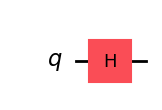

In [29]:
img

3. Vamos a observar la representación en la qSphere

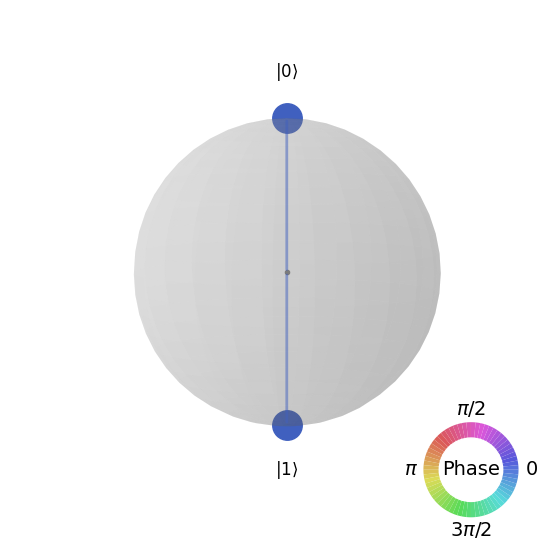

In [30]:
qshere

La esfera de Qiskit (QSphere), como puedes observar, tiene una probabilidad igual de estar en $ |0\rangle $ o $ |1\rangle $. Los extremos de los vectores, como notarás, tienen el mismo diámetro, lo que indica visualmente que ambos tienen igual probabilidad.

La puerta de Hadamard $(H)$ es una puerta única. Veremos esta puerta muchas más veces debido a su importancia y aplicación en diversos algoritmos cuánticos. Ahora continuaremos explorando nuestra última puerta de Pauli, la puerta Z.


## Trabajando con la puerta de fase (Z) de Pauli

La puerta **Z** es comúnmente conocida como una puerta de fase, principalmente porque, en lugar de rotar a lo largo del eje vertical como lo hacen las puertas $X$ y $Y$, la puerta $Z$ rota a lo largo de la longitud del espacio de Hilbert, afectando la fase de dicho espacio. Se denota de la siguiente manera:

$$
Z = \sigma_3 =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

La siguiente tabla de verdad ilustra que la operación rota la entrada alrededor del eje $ z $ por $ \pi $ (180°). Si la rotación se inicializa desde el estado base $ |0\rangle $, entonces la fase no cambia. Sin embargo, si la entrada se inicializa desde el estado $ |1\rangle $, entonces la salida es un cambio de fase de $ \pi $ a $ -|1\rangle $. Esta negación es una característica muy importante que verás en muchos algoritmos cuánticos:


<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|0⟩</td>
    <td>|0⟩</td>
  </tr>
  <tr>
    <td>|1⟩</td>
    <td>-|1⟩</td>
  </tr>
</table>


1. Primero vamos a incicilar un qubit en un estado de superposición

In [31]:
qc = QuantumCircuit(1)
qc.h(0)

# Añadimos una compuerta Z
qc.z(0)

result, img, qshere = execute_circuit_sv(qc)

2. Vamos a examinar el estado del vector

In [32]:
result

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


3. Creemos el digrama del circuito

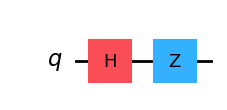

In [33]:
img

4. Creemos el qSphere 

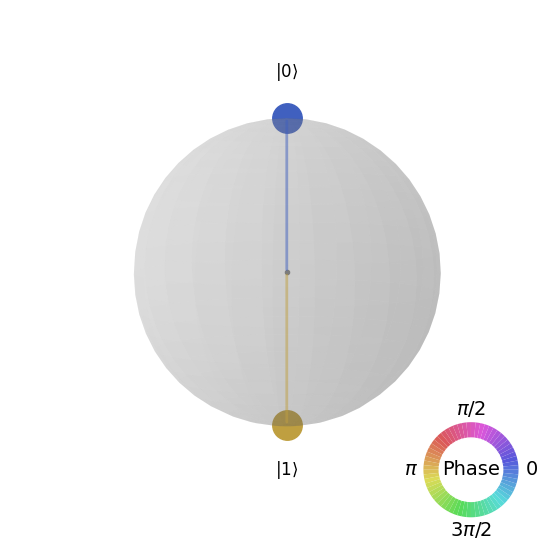

In [34]:
qshere

La QSphere, como puedes observar, tiene una probabilidad igual de estar en $ |0\rangle $ y $ |1\rangle $. Sin embargo, el estado $ |1\rangle $ está fuera de fase por $ \pi $, como se ilustra en la salida.

Como se puede ver, la puerta $Z$ proporciona una forma de realizar un cambio de fase en un qubit, haciendo que el estado del qubit cambie su signo de positivo a negativo. Si deseas ver esto por ti mismo, intenta lo siguiente:

El código que ejecutaste anteriormente para usar una puerta $X$ en la sección de la puerta Not (X) de Pauli. En ese ejemplo, comenzamos con el qubit inicialmente en el estado base $ |0\rangle $ y luego aplicamos una puerta X que resultó en el estado $ |1\rangle $. Ahora, agrega otra línea después de añadir la puerta $X$ e incluye la puerta $Z$. Notarás que el resultado sigue siendo $ |1\rangle $, pero ahora el resultado del estado es negativo. Te dejo que lo pruebes por ti mismo y observes la diferencia.


## Aplicando compuertas de fase

Las puertas de fase son aquellas que utilizamos para mapear $ |1\rangle $ a $ e^{i\phi}|1\rangle $. Estas no tienen un efecto sobre la probabilidad de medir un $ |0\rangle $ o un $ |1\rangle $, pero sí afectan la fase del estado cuántico. Esto puede no ser claro de inmediato, pero al aprender sobre retroalimentación de fase y otros algoritmos que aprovechan los cambios de fase, será más evidente. Por ahora, aprendamos sobre las puertas que operan cambios de fase en un qubit.

### Aplicando la compuerta S

La **puerta S** es similar a la compuerta $Z$, con la única diferencia siendo la cantidad por la cual rota el vector de estado. Para la compuerta $S$, esa rotación es $ \pi/2 $. La representación matricial de la puerta $S$ es la siguiente:

$$
S =
\begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/ \sqrt{2}}
\end{pmatrix}
$$

La siguiente tabla de verdad ilustra que la operación rota la entrada alrededor del eje $ z $ por $ \pi/2 $ (90°). Si la entrada es $ |0\rangle $, entonces la salida sigue siendo $ |0\rangle $, pero si la entrada es $ |1\rangle $, entonces la salida tiene un cambio de fase de $ e^{i\pi/\sqrt{2}} |1\rangle $:

<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|0⟩</td>
    <td>|0⟩</td>
  </tr>
  <tr>
    <td>|1⟩</td>
    <td>e^{i π/√2}|1⟩</td>
  </tr>
</table>

1. La tabla de verdad se ilustra mejor colocando primero el vector sobre el eje $ x $. Para lograr esto, añadiremos una puerta $H$ al qubit antes de aplicar la puerta $S$.


In [35]:
qc = QuantumCircuit(1)
qc.h(0)

# Añadimos una compuerta S al qubit 
qc.s(0)

result, img, qshere = execute_circuit_sv(qc)

2. Vamos a examinar el vector de estado

In [36]:
result

Statevector([ 0.70710678+0.j        , -0.        +0.70710678j],
            dims=(2,))


3. Observemos el diagrama de circuito y la esfera Q para el siguiente circuito cuántico:

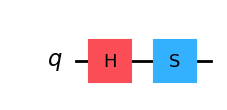

In [37]:
img

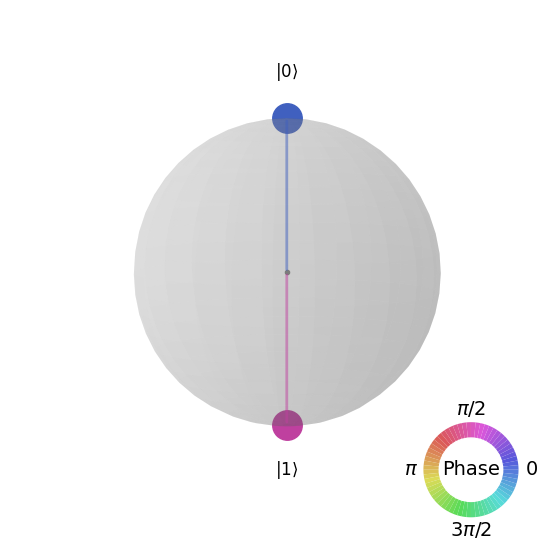

In [38]:
qshere

La QSphere, como puedes observar, tiene una probabilidad igual de estar en $ |0\rangle $ y $ |1\rangle $ con un cambio de fase de $ \pi/2 $. Dado que la puerta S realiza una rotación fija alrededor del eje $ z $ positivo por $ \pi/2 $, ahora veremos cómo rotar en la dirección opuesta por $ \pi/2 $.


## Aplicando la puerta S† (dagger)

La puerta **S†** es exactamente igual a la puerta $S$, con la única diferencia de que rota en la dirección opuesta o negativa. Por lo tanto, los resultados son los mismos, pero negados. La representación matricial ilustra esto al incluir el signo negativo en el cambio de fase:

$$
S^\dagger =
\begin{pmatrix}
1 & 0 \\
0 & e^{-i\pi/\sqrt{2}}
\end{pmatrix}
$$

La siguiente tabla de verdad ilustra que la operación rota la entrada alrededor del eje $ z $ por $ -\pi/2 $ (-90°). Al igual que con la puerta $S$, si la entrada es el estado $ |0\rangle $, la salida sigue siendo $ |0\rangle $. Sin embargo, si la entrada es $ |1\rangle $, la salida es una rotación de fase en la dirección negativa:


<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|0⟩</td>
    <td>|0⟩</td>
  </tr>
  <tr>
    <td>|1⟩</td>
    <td>e^{-i π/√2}|1⟩</td>
  </tr>
</table>


1. La tabla de verdad se ilustra mejor colocando primero el vector sobre el eje $ x $. Para lograr esto, añadiremos una puerta $H$ al qubit antes de aplicar la puerta $S†$.

In [40]:
qc = QuantumCircuit(1)
qc.h(0)
# añadimos una compuerta S† al qubit
qc.sdg(0)
result, img, qshere = execute_circuit_sv(qc)

2. Vamos a examinar el vector de estado

In [41]:
result

Statevector([0.70710678+0.j        , 0.        -0.70710678j],
            dims=(2,))


3. Observemos el diagrama de circuito y la esfera Q para el siguiente circuito cuántico:

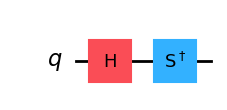

In [43]:
img

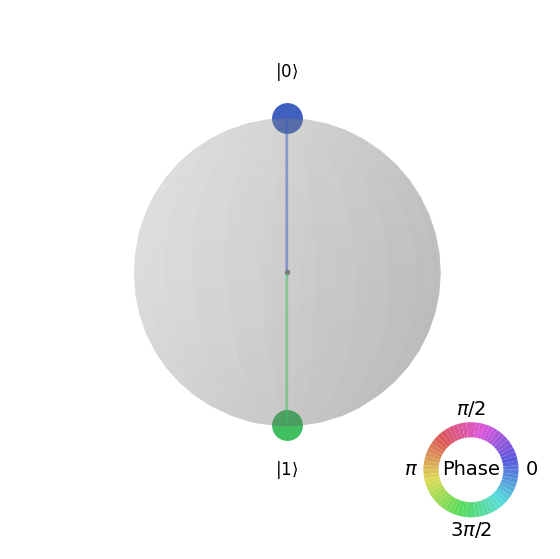

In [42]:
qshere

La QSphere, como puedes observar, tiene una probabilidad igual de estar en $ |0\rangle $ y $ |1\rangle $, con un cambio de fase de $ 3\pi/2 $ o $ -\pi/2 $. Ahora que hemos creado el circuito con una puerta S†, pasaremos a la siguiente sección para entender cómo crear un circuito con una puerta T.


## Usando la puerta T en un circuito

La **puerta T** es similar a la puerta $S$, pero con una rotación de $ \pi/4 $. La representación matricial de esta puerta es la siguiente:

$$
T =
\begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/\sqrt{4}}
\end{pmatrix}
$$

La siguiente tabla de verdad ilustra que la operación rota la entrada alrededor del eje $ z $ por $ \pi/4 $ (45°). Por lo tanto, si la entrada es $ |0\rangle $, la salida será la misma. Si la entrada es $ |1\rangle $, entonces la salida será un cambio de fase de $ \pi/4 $:


<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|0⟩</td>
    <td>|0⟩</td>
  </tr>
  <tr>
    <td>|1⟩</td>
    <td>e^{i π/√4}|1⟩</td>
  </tr>
</table>

Como con todas las puertas de fase, es mejor comenzar en un estado de superposición. Por lo tanto, iniciaremos incluyendo una puerta de Hadamard, y luego crearemos un circuito utilizando la puerta T, como se ilustra en los pasos siguientes.

1. Primero, añadimos una puerta H antes de aplicar la puerta T. Como antes, el diagrama del circuito solo contendrá la puerta T y no la puerta H que se agregó.

2. Luego examinamos los resultados del vector de estado observando los valores generados del qubit.


In [44]:
qc = QuantumCircuit(1)
qc.h(0)

# Añadimos una compuerta T al qubit
qc.t(0) 
result, img, qshere = execute_circuit_sv(qc)
result

Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))


3. Observemos el diagrama de circuito y la esfera Q para el siguiente circuito cuántico:

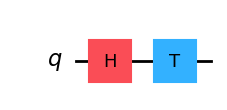

In [45]:
img

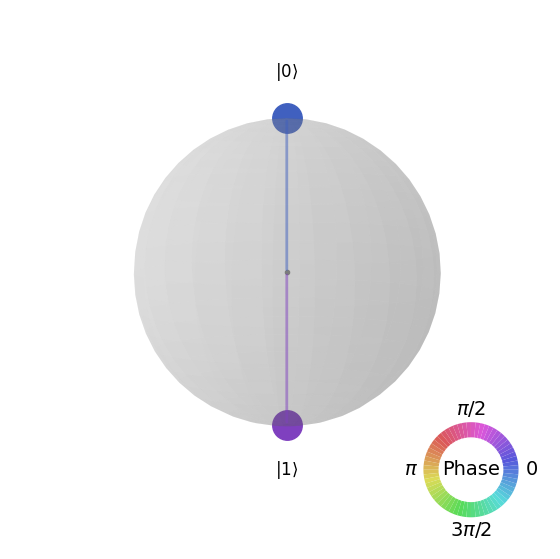

In [46]:
qshere

## Trabajando con la puerta T† (dagger)

La puerta **T†** tiene la misma rotación de fase que la puerta T, es decir, $ \pi/4 $, pero en la dirección opuesta. Su representación matricial se describe como sigue:

$$
T^\dagger =
\begin{pmatrix}
1 & 0 \\
0 & e^{-i\pi/\sqrt{4}}
\end{pmatrix}
$$

La siguiente tabla de verdad ilustra que la operación rota la entrada alrededor del eje \( z \) por \( -\pi/4 \) (-45°). Si la entrada es \( |0\rangle \), entonces la salida será \( |0\rangle \). Si la entrada es \( |1\rangle \), entonces la salida será una rotación negativa de \( -\pi/4 \):

<table>
  <tr>
    <th>Entrada</th>
    <th>Salida</th>
  </tr>
  <tr>
    <td>|0⟩</td>
    <td>|0⟩</td>
  </tr>
  <tr>
    <td>|1⟩</td>
    <td>e^{-iπ/4}|1⟩</td>
  </tr>
</table>

Esto también se ilustra mejor colocando el vector sobre el eje $x$ primero. Crearemos un circuito usando la puerta T† siguiendo estos pasos:

1. Primero, añadimos una puerta $H$ antes de aplicar la puerta $T†$ (tdg). Y examinemos el vector de estado

In [47]:
qc = QuantumCircuit(1)
qc.h(0)

# Añadimos una compuerta T al qubit
qc.t(0) 
result, img, qshere = execute_circuit_sv(qc)
result

Statevector([0.70710678+0.j , 0.5       +0.5j],
            dims=(2,))


2. Observemos el diagrama de circuito y la esfera Q para el siguiente circuito cuántico

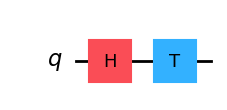

In [48]:
img

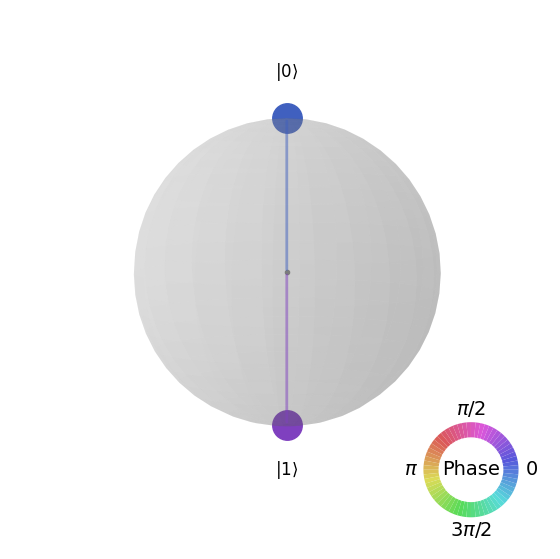

In [49]:
qshere

Las puertas anteriores, como habrás notado, tienen ángulos de rotación predeterminados en el eje horizontal (\( \theta \)) o vertical (\( \phi \)). Si deseas especificar el ángulo de rotación tú mismo, puedes usar las puertas de rotación. Estas puertas de rotación te permiten definir el ángulo con el que deseas rotar alrededor de un eje determinado. Al igual que las otras puertas, estas puertas de rotación también son reversibles y unitarias.

### Usando la puerta $ R_\phi $ en un circuito

Puedes pensar en las puertas $ R_\phi $ como tus puertas de rotación personalizadas. La puerta $ R_\phi $ lleva su nombre por su contraparte en los circuitos clásicos, ya que realiza una operación similar en la que, si el estado actual es $ 0 $ o $ 1 $, entonces la puerta rotará de $ 0 $ a $ 1 $, y viceversa. 

***Nota*** Se utiliza el término *rotar* y no *invertir* (flip). Esto se debe a que la visualización de la operación de las puertas cuánticas generalmente se realiza a través de la QSphere.

Debido a su representación esférica, nos referimos a las operaciones como rotaciones alrededor del eje en el rango $-\pi < \theta < \pi$ (esto se verá claramente en los siguientes ejemplos de código):

#### Rotación en el eje X:
$
R_X(\theta) = 
\begin{pmatrix}
\cos(\theta) & -i \cdot \sin(\theta) \\
-i \cdot \sin(\theta) & \cos(\theta)
\end{pmatrix}
$

#### Rotación en el eje Y:
Al aplicar una rotación en el eje $Y$, obtenemos la siguiente fórmula:
$
R_Y(\theta) = 
\begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{pmatrix}
$

#### Rotación en el eje Z:
Finalmente, una rotación en el eje $Z$ da como resultado la siguiente fórmula:
$
R_Z(\theta) = 
\begin{pmatrix}
e^{-i\theta} & 0 \\
0 & e^{i\theta}
\end{pmatrix}
$

### Creación de un circuito con una puerta de rotación
Crearemos un circuito utilizando una de las puertas de rotación: seleccionemos la puerta $R_Z$:

1. Primero, rotaremos a lo largo del eje $z$ por $\pi / 6$. Usaremos la biblioteca `math` para importar $\pi$, y aplicaremos nuestra confiable puerta $H$ para ilustrar el desplazamiento de fase.



In [50]:
from math import pi
# Compuerta R_z
# Crea un circuito de 1 qubit

qc = QuantumCircuit(1)

# Añade una compuerta H para vizualizar la rotación en el plano de la esfera Q
qc.h(0)

# Añade una compuerta R_z con un ángulo de pi/6
qc.rz(pi/6, 0)

result, img, qshere = execute_circuit_sv(qc)

evaluemos el vector de estado 

In [51]:
result

Statevector([0.6830127-0.1830127j, 0.6830127+0.1830127j],
            dims=(2,))


2. Observemos el diagrama del circuito y la qsphere

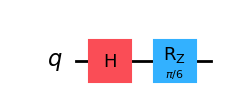

In [52]:
img

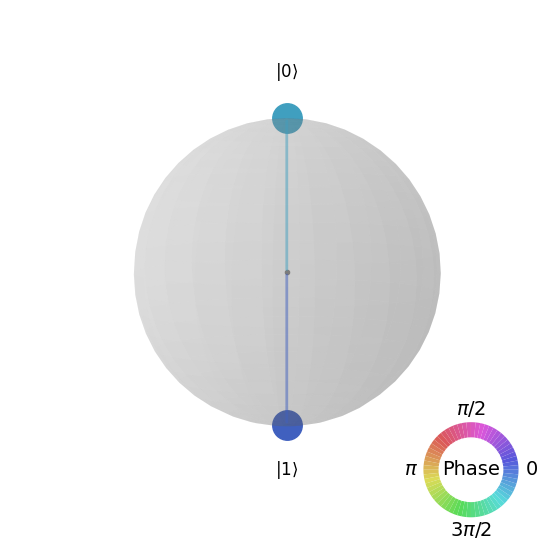

In [53]:
qshere

Estas puertas de rotación nos ayudan a proporcionar rotaciones específicas alrededor de cada eje. Existen puertas universales que nos permiten crear estas otras puertas utilizando solo una de estas puertas universales, así que revisemos estas a continuación.

### Aplicación de las puertas universales $ U_x $

Las puertas $ U_x $, como se mencionó anteriormente, se utilizan para definir un sistema cuántico universal en el que se necesita garantizar que el sistema cuántico cumpla con ciertos criterios, siendo el más popular el **criterio de DiVincenzo**, que, como parte de su lista, establece que debe haber un conjunto universal de puertas cuánticas.

Se discutió cómo, en un sistema clásico, tanto las puertas NOR como NAND se consideran puertas universales clásicas. En un sistema cuántico, las puertas $ U_1 $, $ U_2 $ y $ U_3 $ se definen como puertas universales debido a su capacidad para proporcionar hasta dos grados de libertad para rotar dentro del espacio de Hilbert de un qubit. Cada puerta tiene campos de parámetros que determinan cuánto debe moverse el vector de estado a lo largo de un eje dado. Analicemos cada una de ellas individualmente y luego aplicaremos cada puerta a un qubit para examinar los resultados. Comencemos con la puerta $ U_3 $.

La puerta $ U_3 $ tiene tres parámetros que se aplican como rotaciones en todos los ejes, es decir, los ejes $ x $, $ y $ y $ z $, respectivamente. La representación matricial de la puerta $ U_3 $ se define como sigue:

$$
U_3 (\theta, \phi, \lambda) =
\begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2)
\end{pmatrix}
$$



In [62]:
# Puerta U3
# Crea un circuito de 1 qubit
qc = QuantumCircuit(1)
# añade una compuerta H 
qc.h(0)
# añade una compuerta U3 con los parámetros theta, phi y lambda donde todos son iguales a pi/2
qc.u(pi/2, pi/2, pi/2, 0)

result, img, qshere = execute_circuit_sv(qc)

In [63]:
result  

Statevector([ 0.5-0.5j, -0.5+0.5j],
            dims=(2,))


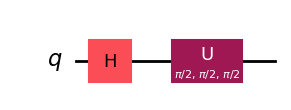

In [64]:
img

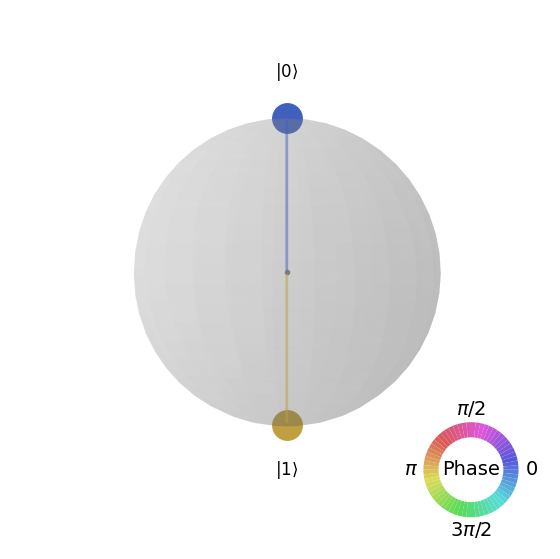

In [65]:
qshere

La puerta $ U_3 $ es un superconjunto de las puertas $ U_2 $ y $ U_1 $, ya que los parámetros que se pasan a las puertas $ U_2 $ y $ U_1 $ llenarían los parámetros respectivos en la puerta $ U_3 $. La puerta $ U_3 $ es utilizada por el transpiler para ejecutar el circuito. A medida que describimos las puertas, descompondremos el circuito para ver cómo se realiza esto.

